In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def watermark(img, mask, alpha = 1):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h,w = img.shape[0], img.shape[1]
    scale_ptg = 0.2
    if w > h:
        rate = int(w * scale_ptg) / mask.shape[1]
    else:
        rate = int(h * scale_ptg) / mask.shape[0]
    mask = cv2.resize(mask, None, fx=rate, fy=rate)
    
    mask_h, mask_w = mask.shape[0], mask.shape[1]
    mask_channels = cv2.split(mask)
    dst_channels = cv2.split(img)
    b, g, r, a = cv2.split(mask)

    # 计算mask在图片的坐标
    
    ul_points = (int(h * (1-scale_ptg)), int(int(w*(1-scale_ptg)) - mask_w / 2))   #左上角点
    dr_points = (int(h * (1-scale_ptg)) + mask_h, int(int(w*(1-scale_ptg)) + mask_w / 2)) #右下角点
    
#     ul_points = (int(h * (1-scale_ptg)), int(int(w*scale_ptg) - mask_w / 2))   #左上角点
#     dr_points = (int(h * (1-scale_ptg)) + mask_h, int(int(w*scale_ptg) + mask_w / 2)) #右下角点
    
    for i in range(3):
        dst_channels[i][ul_points[0] : dr_points[0], ul_points[1] : dr_points[1]] = dst_channels[i][ul_points[0] : dr_points[0], ul_points[1] : dr_points[1]] * (255.0 - a * alpha) / 255
        dst_channels[i][ul_points[0] : dr_points[0], ul_points[1] : dr_points[1]] += np.array(mask_channels[i] * (a * alpha / 255), dtype=np.uint8)
    dst_img = cv2.merge(dst_channels)
    return dst_img

In [18]:
img = cv2.imread("test-1.jpg")
mask = cv2.imread("logo.png", cv2.IMREAD_UNCHANGED)

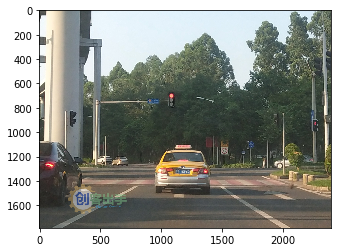

In [19]:
plt.imshow(watermark(img, mask, 0.5))